# Implementation of Regression and Tree Decision Models

In order to 

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("food_sales_forecast_cleaned.csv")
df.head()

,Outlet_Location_Type,Outlet_Type,Outlet_Identifier,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Item_Outlet_Sales
0,Tier 1,Grocery Store,OUT019,DRA24,Regular,0.069909,Soft Drinks,163.2868,Small,491.3604
1,Tier 1,Grocery Store,OUT019,DRA59,Regular,0.223985,Soft Drinks,186.2924,Small,555.2772
2,Tier 1,Grocery Store,OUT019,DRC25,Low Fat,0.079440,Soft Drinks,86.7882,Small,85.8882
3,Tier 1,Grocery Store,OUT019,DRD15,Low Fat,0.099442,Dairy,233.1642,Small,697.0926
4,Tier 1,Grocery Store,OUT019,DRD25,Low Fat,0.138270,Soft Drinks,111.6860,Small,452.7440


## Splitting the Dataset 

In [31]:
X = df.drop(columns=["Item_Outlet_Sales", "Item_Identifier"])
y = df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
print(f"Numerical columns: {num_features} \nCategorical columns: {cat_features}")
#print(f"Nominal features: {features[0]} \nCategorical features: {features[1]}")

Numerical columns: ['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'] 
Categorical columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In this case we can observe that the all the **ordinal features** are as follow:
- Item_Fat_content
- Outlet_Size

The **nominal features** are the following:
- Item_Identifier --> This column will be deleted because it has more that 1000 categories and it is possible to do the analysis without the column.
- Item_Type
- Outlet_Identifier
- Outlet_Location_Type
- Outlet_Type

## Instantiate Transformers

In [33]:
ordinal_encoder = OrdinalEncoder()
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

## Instantiate Pipelines

In [34]:
num_pipe = make_pipeline(scaler)
ord_cat_pipe = make_pipeline(ordinal_encoder)
nom_cat_pipe = make_pipeline(ohe)

In [35]:
num_tuple = (num_pipe, ['Item_Visibility', 'Item_MRP'])
ord_tuple = (ord_cat_pipe, ["Item_Fat_Content", "Outlet_Size"])
nom_tuple = (nom_cat_pipe, ["Item_Type", "Outlet_Identifier", "Outlet_Location_Type", "Outlet_Type"])

## Instantiate ColumnTransformer

In [36]:
preprocessor = make_column_transformer(num_tuple, ord_tuple, nom_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Visibility', 'Item_MRP']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

In [37]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Visibility', 'Item_MRP']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

In [38]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Models

### Linear regression

In [40]:
reg = LinearRegression() # to instantiate the class
reg.fit(X_train_processed, y_train) # stimate the parameters

LinearRegression()

In [41]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

### $R²$

In [42]:
reg_train_score = reg.score(X_train_processed, y_train)
reg_test_score = reg.score(X_test_processed, y_test)
print(f"Train Score: {reg_train_score}")
print(f"Test Score: {reg_test_score}")

Train Score: 0.5657800090786036
Test Score: 0.5564388562864708


### Regression predictions

### Mean Square Error

In [43]:
train_pred = reg.predict(X_train_processed)
test_pred = reg.predict(X_test_processed)

In [44]:
mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)
print(mse_train)
print(mse_test)

1260169.7130376247
1304386.9835676693


In [45]:
print(np.sqrt(mse_train), "\n", np.sqrt(mse_test))

1122.572809682127 
 1142.0976243595244


### Regression Tree

In [46]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
tree_train_pred = dec_tree.predict(X_train_processed)
tree_test_pred = dec_tree.predict(X_test_processed)

In [48]:
tree_r2_train_score = dec_tree.score(X_train_processed, y_train)
tree_r2_test_score = dec_tree.score(X_test_processed, y_test)
print(tree_r2_train_score,"\n",tree_r2_test_score)

1.0 
 0.22132827141710942


We notice that the model presents overfithing, so let's modify the hyperparameters. 

In [49]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [50]:
dec_tree.get_depth()

39

In [51]:
max_depth_range = list(range(2, 39))
r2 = []

for depth in max_depth_range:
    tree = DecisionTreeRegressor(max_depth=depth,
                                random_state=42)
    tree.fit(X_train_processed, y_train)
    r2.append(tree.score(X_test_processed, y_test))

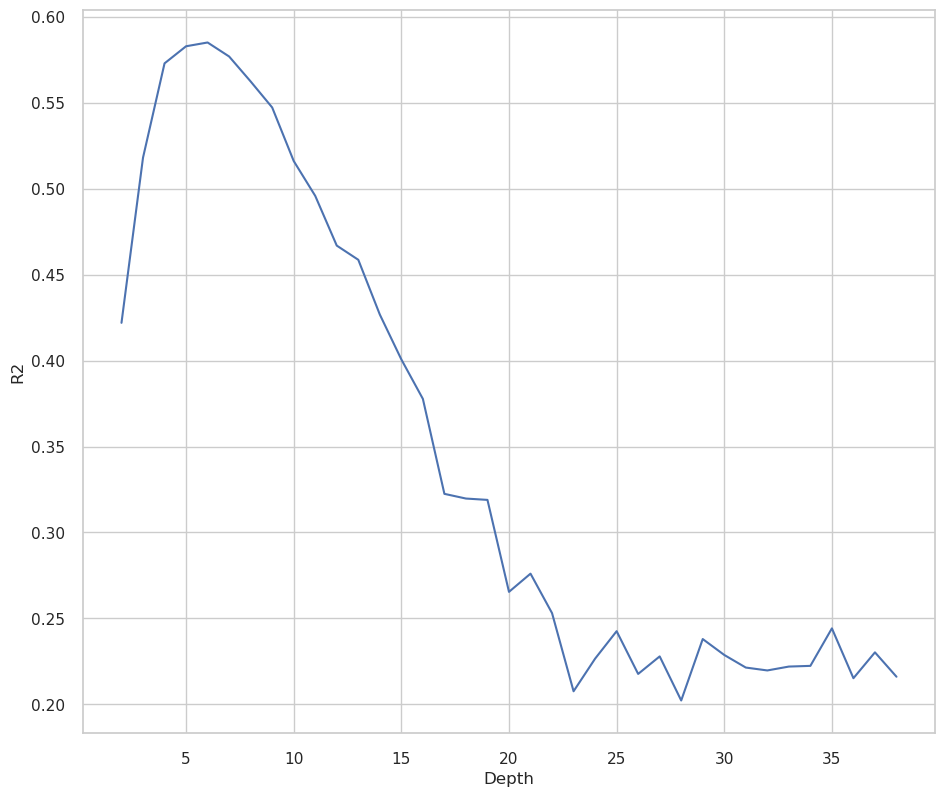

In [52]:
plt.plot(max_depth_range, r2)
plt.xlabel("Depth")
plt.ylabel("R2")
plt.show()

In [67]:
tree_depth_9 = DecisionTreeRegressor(max_depth=7, random_state=42)
tree_depth_9.fit(X_train_processed, y_train)
print(tree_depth_9.score(X_train_processed, y_train),
     "\n", tree_depth_9.score(X_test_processed, y_test))

0.6284752053306103 
 0.5770529077175293
